In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/DMFC/JMCOH-Data.xlsx"
df=pd.read_excel(AA)
df.head(5)


,Graphite Powder,Graphene,Carbon Quantum Dots,Single- Walled Carbon nanotube,Multi- Walled Carbon nanotube,Carbon Nanofiber,Mesoporous Carbon,Carbon Black,Ntirogen,Sulphur,...,Ru,SnO2,TiO2,Zn,Heteropolyacid,H2SO4(M),HClO4(M),Methanol(M),Scan Rate,Mass Activity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60,0.0,0.0,...,0.140,0.0,0.0,0.0,0.0,0.5,0.0,1.0,20.0,138.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,0.0,0.0,...,0.130,0.0,0.0,0.0,0.0,0.5,0.0,1.0,20.0,444.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57,0.0,0.0,...,0.120,0.0,0.0,0.0,0.0,0.5,0.0,1.0,20.0,323.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.5,0.0,1.0,20.0,575.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.83,0.0,0.0,...,0.004,0.0,0.0,0.0,0.0,0.5,0.0,1.0,10.0,100.0


In [3]:
X = pd.read_excel(AA, usecols='A:AG') 
Y=pd.read_excel(AA, usecols='AH')

In [4]:
import seaborn as sns

In [8]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y.values.ravel(), test_size=0.2, random_state=42)
X.shape
X.head(5)

,Graphite Powder,Graphene,Carbon Quantum Dots,Single- Walled Carbon nanotube,Multi- Walled Carbon nanotube,Carbon Nanofiber,Mesoporous Carbon,Carbon Black,Ntirogen,Sulphur,...,Pt,Ru,SnO2,TiO2,Zn,Heteropolyacid,H2SO4(M),HClO4(M),Methanol(M),Scan Rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.60,0.0,0.0,...,0.260,0.140,0.0,0.0,0.0,0.0,0.5,0.0,1.0,20.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58,0.0,0.0,...,0.290,0.130,0.0,0.0,0.0,0.0,0.5,0.0,1.0,20.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57,0.0,0.0,...,0.310,0.120,0.0,0.0,0.0,0.0,0.5,0.0,1.0,20.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.0,0.0,...,0.150,0.000,0.0,0.0,0.0,0.0,0.5,0.0,1.0,20.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.83,0.0,0.0,...,0.166,0.004,0.0,0.0,0.0,0.0,0.5,0.0,1.0,10.0


In [9]:
Y.head(5)

,Mass Activity
0,138.0
1,444.0
2,323.0
3,575.0
4,100.0


195.42250524814847
224.229259129012
0.9263649265408461
0.8885030390134226
RandomForestRegressor(min_samples_leaf=2, n_estimators=189, random_state=42)


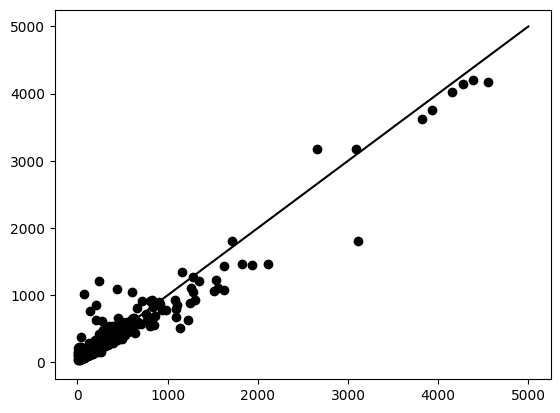

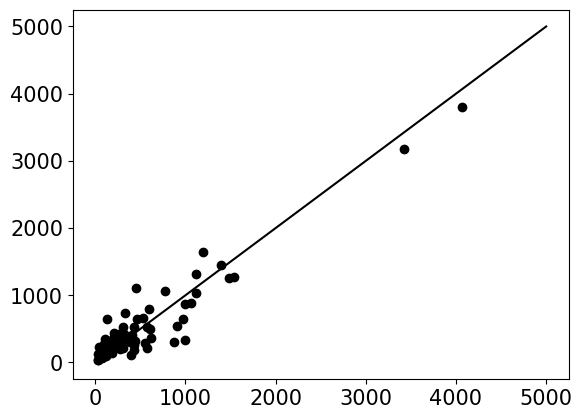

In [10]:
import math 
hyper_params_rdf = {'n_estimators':np.arange(1, 400, 1), 
                   } 
                    
np.random.seed(22)
RF=RandomForestRegressor(random_state=42, min_samples_leaf=2  )
g_search_RF = RandomizedSearchCV(RF, hyper_params_rdf, cv=10, n_jobs=-1, )
rf_model=g_search_RF.fit(X_Train,Y_Train)
predict_rf_train=g_search_RF.predict(X_Train)
predict_rf_test=g_search_RF.predict(X_Test)
mse_rf_test = mean_squared_error(Y_Test, predict_rf_test)
mse_rf_train = mean_squared_error(Y_Train,predict_rf_train)
print(math.sqrt(mse_rf_train))
print(math.sqrt(mse_rf_test))
r2_rf_train = r2_score(Y_Train, predict_rf_train)
r2_rf_test = r2_score(Y_Test, predict_rf_test)
print( r2_rf_train)
print(r2_rf_test)
print(g_search_RF.best_estimator_)
plt.scatter(Y_Train, predict_rf_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()
plt.scatter(Y_Test, predict_rf_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

232.16420246026198
237.9912027177084
0.8960735519783681
0.8743969244481506
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=344, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


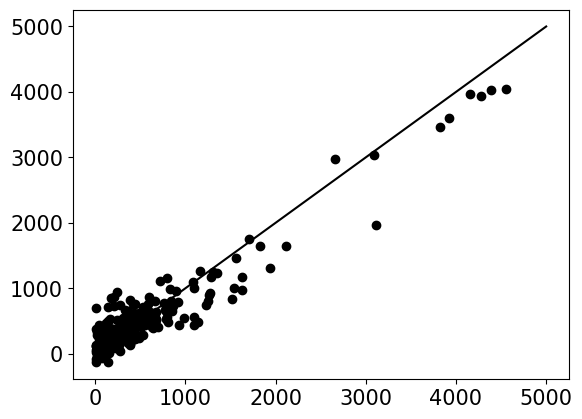

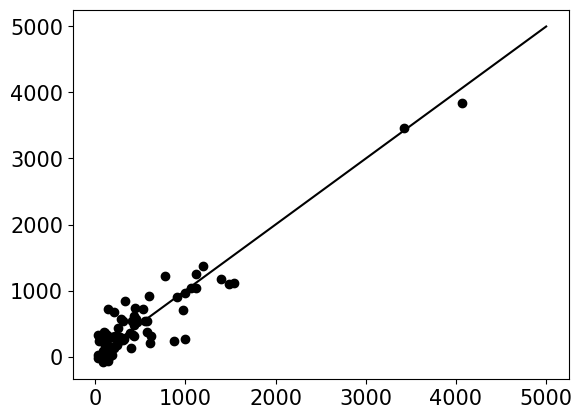

In [11]:
hyper_params_xgb = {'n_estimators':np.arange(1, 400, 1), 
                   }                  
np.random.seed(22)
xgb=xg.XGBRegressor(random_state=42, max_depth=3, colsample_bytree=0.6, min_child_weight=6, subsample=0.4, learning_rate=0.06  )
g_search_xgb = RandomizedSearchCV(xgb, hyper_params_xgb, cv=10, n_jobs=-1)
g_search_xgb.fit(X_Train, Y_Train);
predict_xg_train = g_search_xgb.predict(X_Train)
predict_xg_test = g_search_xgb.predict(X_Test)
mse_xg_test = mean_squared_error(Y_Test,predict_xg_test)
mse_xg_train = mean_squared_error(Y_Train,predict_xg_train)
print(math.sqrt(mse_xg_train))
print(math.sqrt(mse_xg_test))
r2_xg_train = r2_score(Y_Train,predict_xg_train)
r2_xg_test = r2_score(Y_Test,predict_xg_test)
print(r2_xg_train)
print(r2_xg_test)
print(g_search_xgb.best_estimator_)
plt.scatter(Y_Train,predict_xg_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_xg_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()

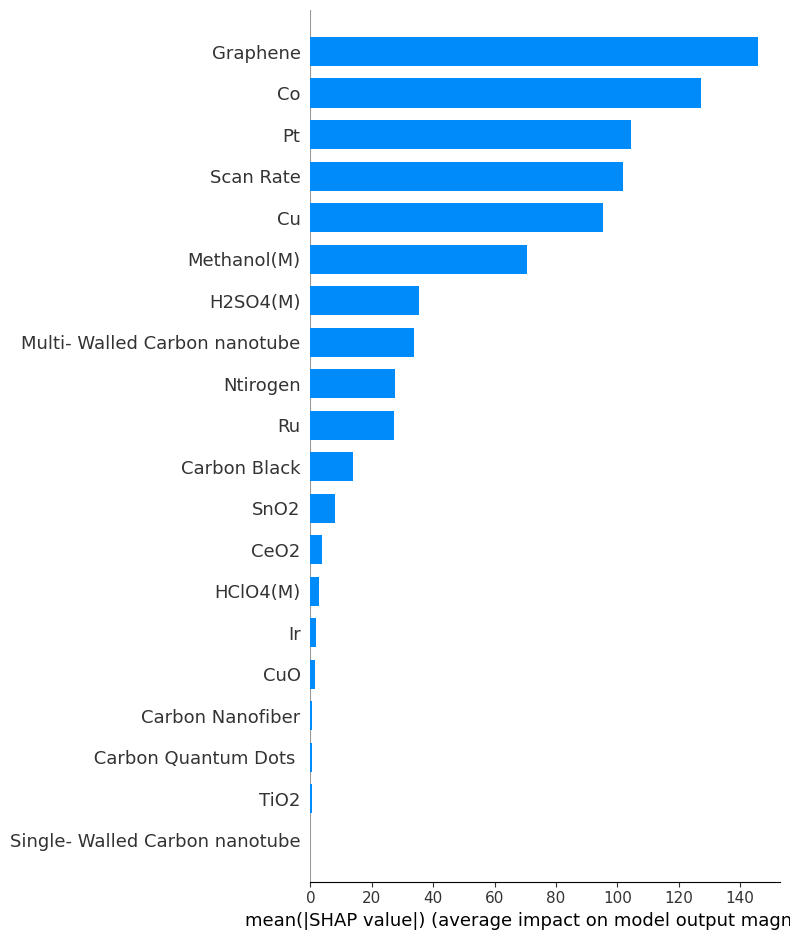

In [12]:
import shap
xgb=xg.XGBRegressor(random_state=42, max_depth=3, colsample_bytree=0.6, min_child_weight=6, subsample=0.4, learning_rate=0.05, n_estimators=344)
xgb.fit(X_Train, Y_Train);
explainer = shap.TreeExplainer(xgb, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')

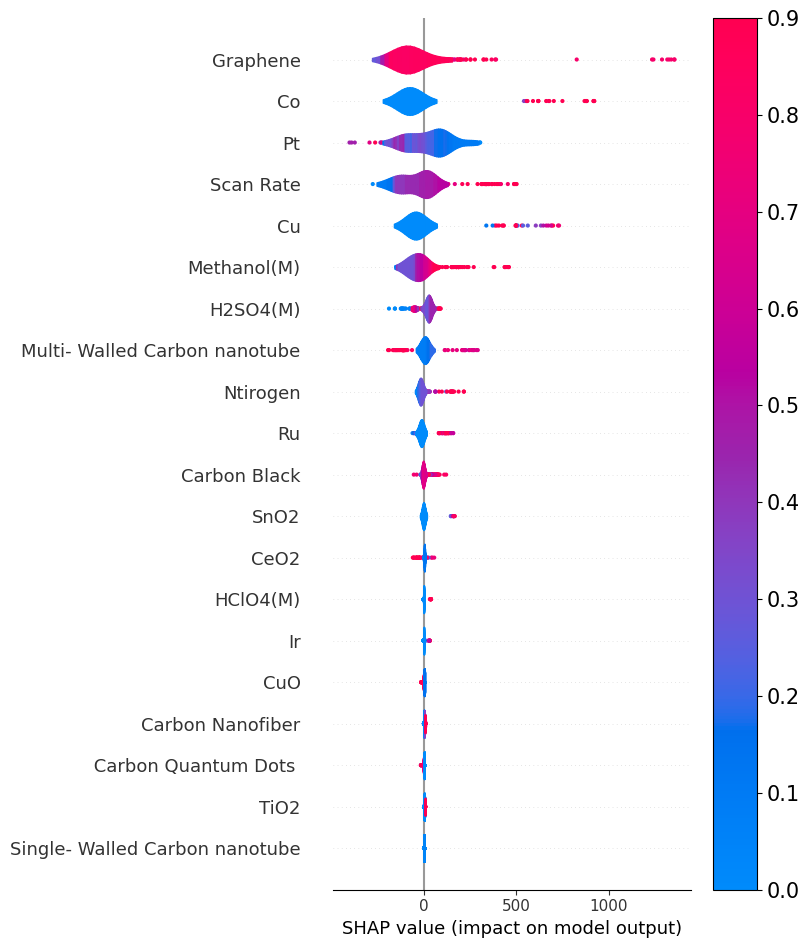

In [13]:
shap.summary_plot(shap_values_XGB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

264.10440968273514
266.4022380744483
0.8655109652551283
0.8426183100612988
GradientBoostingRegressor(learning_rate=0.01, n_estimators=344, random_state=42,
                          subsample=0.3)


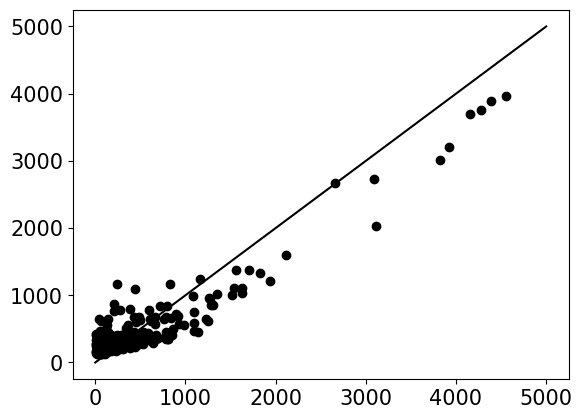

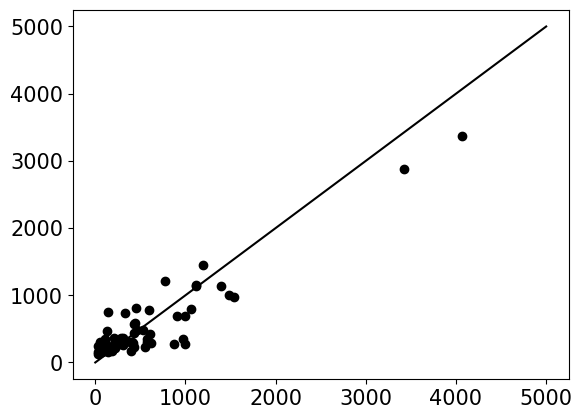

In [14]:
hyper_params_GBR = {"n_estimators":np.arange(1, 400, 1),}
np.random.seed(22)
GB= GradientBoostingRegressor(random_state=42, learning_rate=0.01, subsample=0.3, min_samples_leaf=1 )
g_search_GB = RandomizedSearchCV(GB, hyper_params_GBR, cv=10, n_jobs=-1)
g_search_GB.fit(X_Train, Y_Train);
predict_GB_train = g_search_GB.predict(X_Train)
predict_GB_test = g_search_GB.predict(X_Test)
mse_GB_test = mean_squared_error(Y_Test,predict_GB_test)
mse_GB_train = mean_squared_error(Y_Train,predict_GB_train)
print(math.sqrt(mse_GB_train))
print(math.sqrt(mse_GB_test))
r2_GB_train = r2_score(Y_Train,predict_GB_train)
r2_GB_test = r2_score(Y_Test,predict_GB_test)
print(r2_GB_train)
print(r2_GB_test)
print(g_search_GB.best_estimator_)
plt.scatter(Y_Train,predict_GB_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_GB_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()

152.40623206274262
226.08320174233472
0.9552141291114435
0.8866516882141084
ExtraTreesRegressor(min_samples_leaf=2, n_estimators=304, random_state=42)


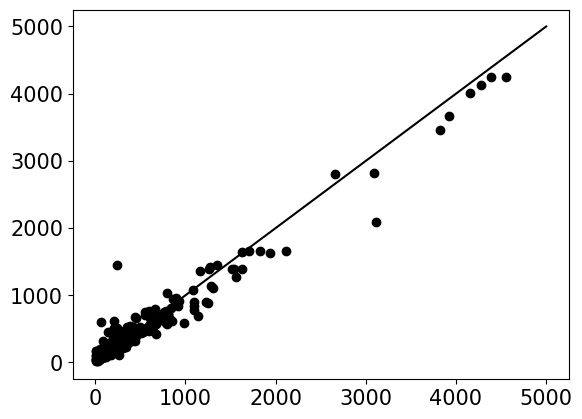

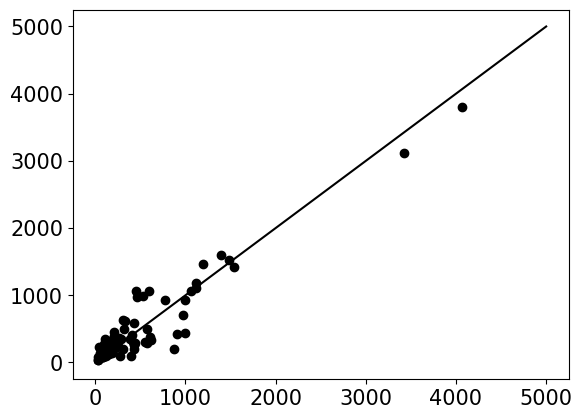

In [15]:
hyper_params_etg = {'n_estimators':np.arange(1, 400, 1),}
np.random.seed(22)
etg_tune = ExtraTreesRegressor(random_state=42,  min_samples_leaf=2,  )
g_search_etg = RandomizedSearchCV(etg_tune, hyper_params_etg, cv=10, n_jobs=-1)
g_search_etg.fit(X_Train, Y_Train);
predict_etg_train = g_search_etg.predict(X_Train)
predict_etg_test = g_search_etg.predict(X_Test)
mse_etg_test = mean_squared_error(Y_Test,predict_etg_test)
mse_etg_train = mean_squared_error(Y_Train,predict_etg_train)
print(math.sqrt(mse_etg_train))
print(math.sqrt(mse_etg_test))
r2_etg_train = r2_score(Y_Train,predict_etg_train)
r2_etg_test = r2_score(Y_Test,predict_etg_test)
print(r2_etg_train)
print(r2_etg_test)
print(g_search_etg.best_estimator_)
plt.scatter(Y_Train, predict_etg_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_etg_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()

276.621465884193
281.24250937091296
0.8524608326038906
0.824595635805766
DecisionTreeRegressor(max_depth=17, min_samples_leaf=4, min_samples_split=13,
                      random_state=42)


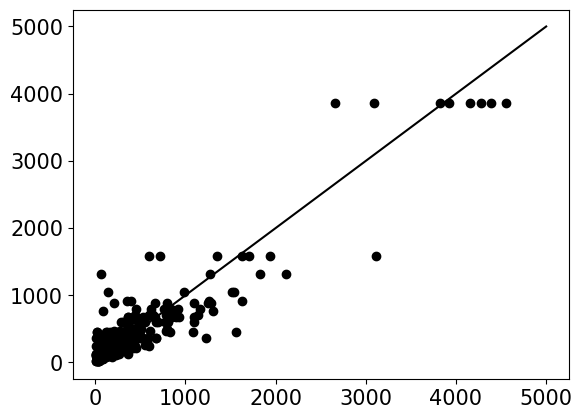

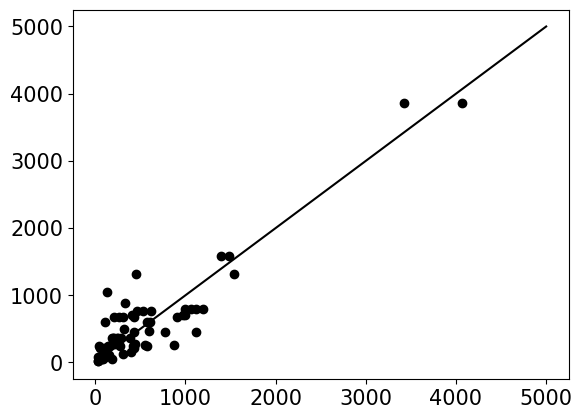

In [17]:
hyper_params_DT = {"min_samples_split":np.arange(2,20,1),
                    "max_depth":np.arange(1,20,1), }
np.random.seed(22)
DT= DecisionTreeRegressor(random_state=42, min_samples_leaf=4 )
g_search_DT = RandomizedSearchCV(DT, hyper_params_DT, cv=10, n_jobs=-1)
g_search_DT.fit(X_Train, Y_Train);
predict_DT_train = g_search_DT.predict(X_Train)
predict_DT_test = g_search_DT.predict(X_Test)
mse_DT_test = mean_squared_error(Y_Test,predict_DT_test)
mse_DT_train = mean_squared_error(Y_Train,predict_DT_train)
print(math.sqrt(mse_DT_train))
print(math.sqrt(mse_DT_test))
r2_DT_train = r2_score(Y_Train,predict_DT_train)
r2_DT_test = r2_score(Y_Test,predict_DT_test)
print(r2_DT_train)
print(r2_DT_test)
print(g_search_DT.best_estimator_)
plt.scatter(Y_Train, predict_DT_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_DT_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
